In [3]:
#Import all needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
# Input data files are available in the directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir())

['.DS_Store', '.ipynb_checkpoints', 'classification_template.py', 'classification_template.R', 'EDA 2 WSET2.ipynb', 'EDA W data.ipynb', 'H classification.ipynb', 'heart.csv', 'heartDiseaseAndAges.png', 'Wine.csv', 'winequality-red.csv', 'winequality-white.csv']


In [4]:
# We are reading our data to df 
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


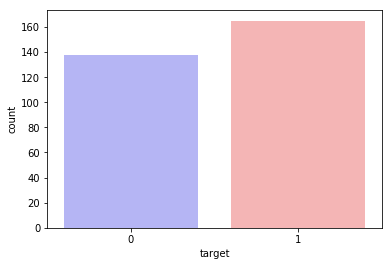

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [5]:
#How many patients do we have with heart disease and not
#Target column tells us if patient has or not the heart disease
sns.countplot(x="target", data=df, palette="bwr")
plt.show()
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

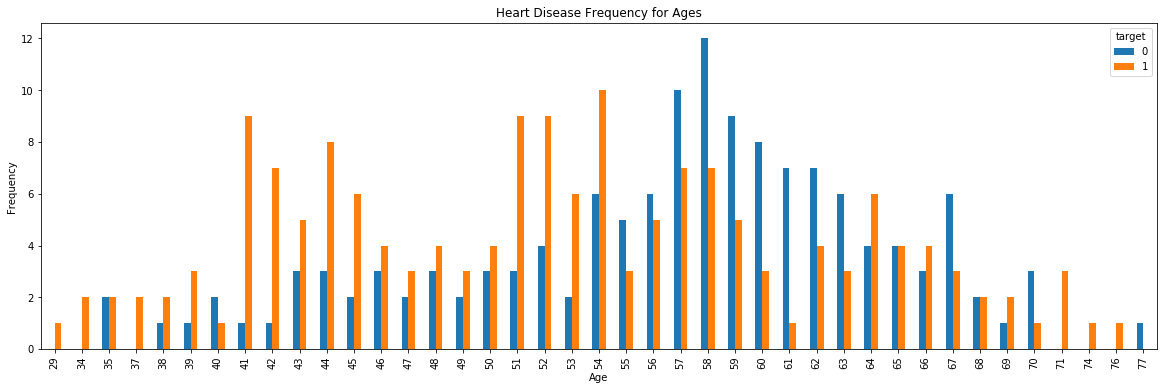

In [6]:
#Measuring heart disease by ages
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

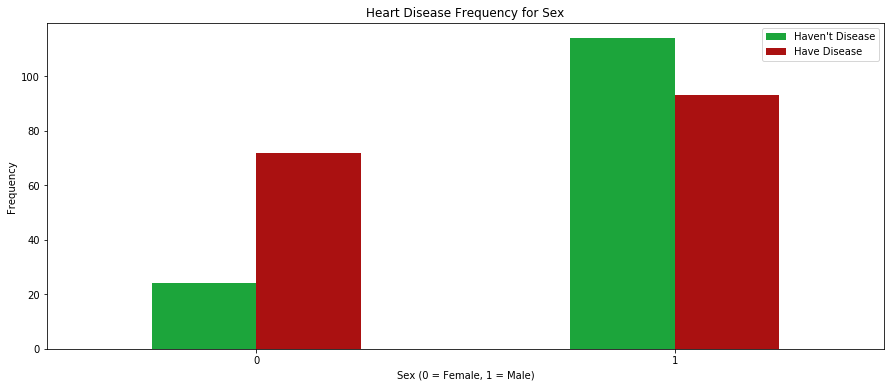

In [7]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

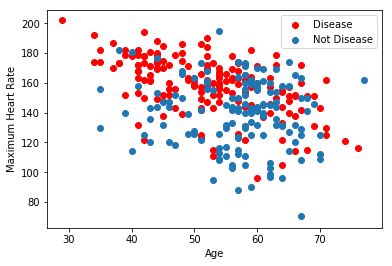

In [8]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


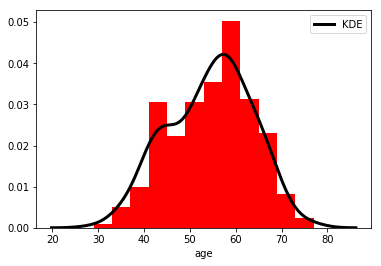

In [9]:
sns.distplot(df['age'],color='Red',hist_kws={'alpha':1,"linewidth": 2}, kde_kws={"color": "k", "lw": 3, "label": "KDE"})
#Most people age is from 40 to 60



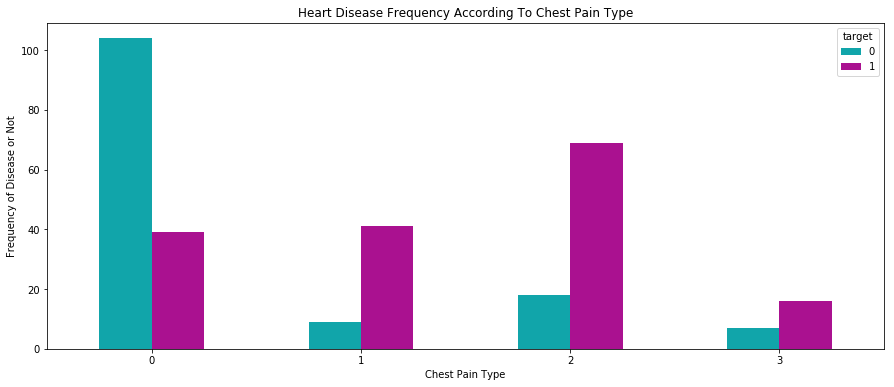

In [10]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [11]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

Male : 207
Female : 96


In [16]:
#Are there any duplicated values ?
df[df.duplicated() == True]

#If so, we drop them
df.drop_duplicates(inplace = True)
df[df.duplicated() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [17]:
#Sex distribution
male_count = df.sex.value_counts().tolist()[0]
female_count = df.sex.value_counts().tolist()[1]
print('Male :',male_count)
print('Female :',female_count)

Male : 206
Female : 96


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2117: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


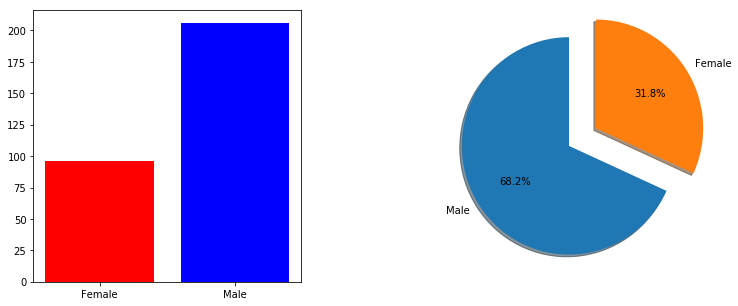

In [19]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,5),constrained_layout=True)
plt.subplots_adjust(wspace = 0.5)

ax1.bar(df.sex.unique(),df.sex.value_counts(),color = ['blue','red'],width = 0.8)
ax1.set_xticks(df.sex.unique())
ax1.set_xticklabels(('Male','Female'))

ax2.pie((male_count,female_count), labels = ('Male','Female'), autopct='%1.1f%%', shadow=True, startangle=90, explode=[0,0.3])

plt.show()

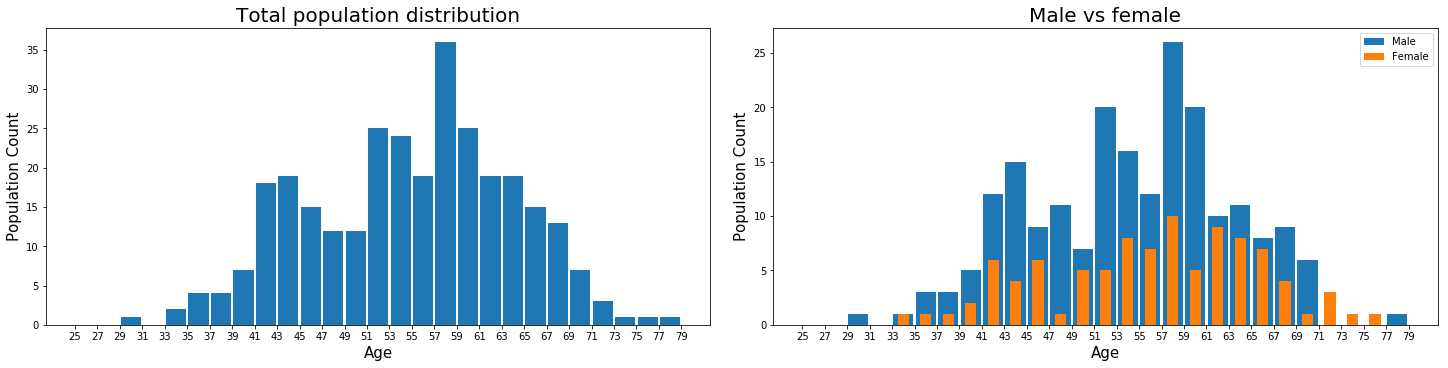

In [21]:
# Population Distribution with age and sex

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,5),constrained_layout=True)
bin_x = range(25,80,2)

ax1.hist(df.age.tolist(),bins=bin_x,rwidth=0.9)
ax1.set_xticks(range(25,80,2))
ax1.set_xlabel('Age',fontsize=15)
ax1.set_ylabel('Population Count',fontsize=15)
ax1.set_title('Total population distribution',fontsize=20)

ax2.hist(df[df['sex']==1].age.tolist(),label = 'Male',bins=bin_x,rwidth=0.9)
ax2.hist(df[df['sex']==0].age.tolist(),label = 'Female',bins=bin_x,rwidth=0.5)
ax2.legend()
ax2.set_xticks(range(25,80,2))
ax2.set_xlabel('Age',fontsize=15)
ax2.set_ylabel('Population Count',fontsize=15)
ax2.set_title('Male vs female',fontsize=20)

plt.show()

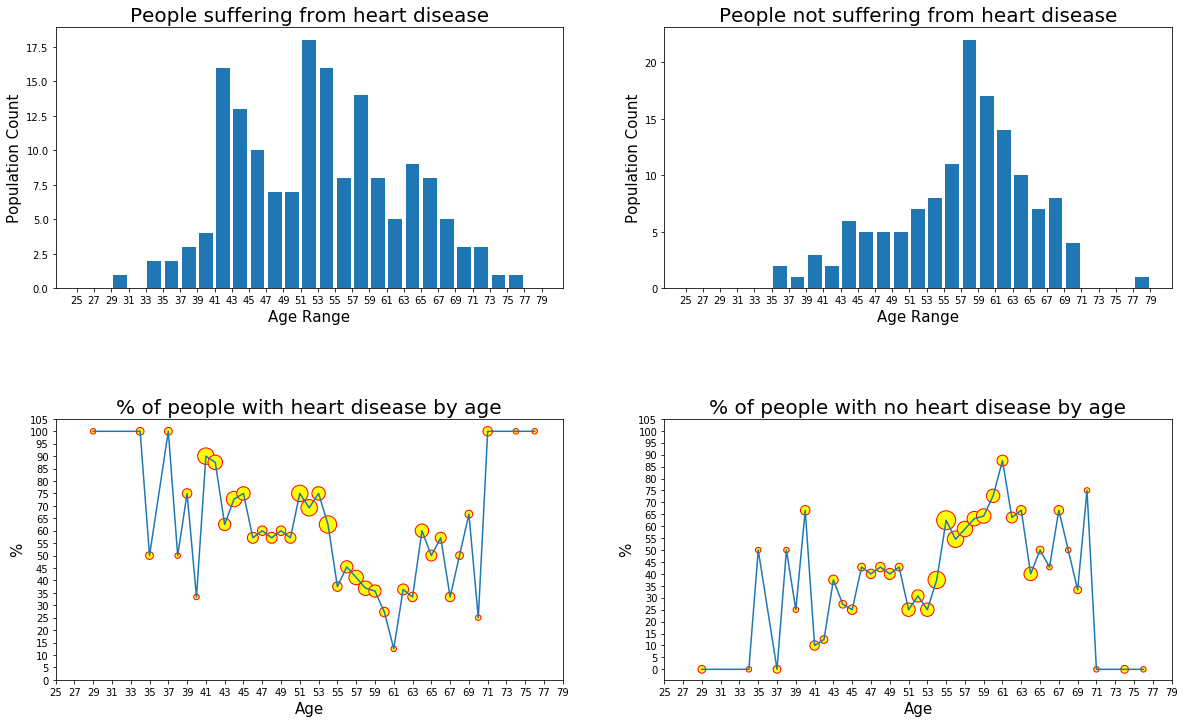

In [22]:
# Population distribution for heart disease

x = df.groupby(['age','target']).agg({'sex':'count'})
y = df.groupby(['age']).agg({'sex':'count'})
z = (x.div(y, level='age') * 100)
q= 100 - z

fig, axes = plt.subplots(2,2, figsize = (20,12))
plt.subplots_adjust(hspace = 0.5)

axes[0,0].hist(df[df['target']==1].age.tolist(),bins=bin_x,rwidth=0.8)
axes[0,0].set_xticks(range(25,80,2))
axes[0,0].set_xlabel('Age Range',fontsize=15)
axes[0,0].set_ylabel('Population Count',fontsize=15)
axes[0,0].set_title('People suffering from heart disease',fontsize=20)

axes[0,1].hist(df[df['target']==0].age.tolist(),bins=bin_x,rwidth=0.8)
axes[0,1].set_xticks(range(25,80,2))
axes[0,1].set_xlabel('Age Range',fontsize=15)
axes[0,1].set_ylabel('Population Count',fontsize=15)
axes[0,1].set_title('People not suffering from heart disease',fontsize=20)

axes[1,0].scatter(z.xs(1,level=1).reset_index().age,z.xs(1,level=1).reset_index().sex,s=(x.xs(1,level=1).sex)*30,edgecolors = 'r',c = 'yellow')
axes[1,0].plot(z.xs(1,level=1).reset_index().age,z.xs(1,level=1).reset_index().sex)
axes[1,0].set_xticks(range(25,80,2))
axes[1,0].set_yticks(range(0,110,5))
axes[1,0].set_xlabel('Age',fontsize=15)
axes[1,0].set_ylabel('%',fontsize=15)
axes[1,0].set_title('% of people with heart disease by age',fontsize=20)

axes[1,1].scatter(z.xs(1,level=1).reset_index().age,q.xs(1,level=1).reset_index().sex,s=(x.xs(0,level=1).sex)*30,edgecolors = 'r',c = 'yellow')
axes[1,1].plot(z.xs(1,level=1).reset_index().age,q.xs(1,level=1).reset_index().sex)
axes[1,1].set_xticks(range(25,80,2))
axes[1,1].set_yticks(range(0,110,5))
axes[1,1].set_xlabel('Age',fontsize=15)
axes[1,1].set_ylabel('%',fontsize=15)
axes[1,1].set_title('% of people with no heart disease by age',fontsize=20)

plt.show()

In [ ]:
#        Data has lot more entries for Male compare to Female
#        Majority of people suffering from heart disease lies between age 40 to 65
#        Proability of getting heart disease starts reduce significiently after age of 60
#       People from age 37 to 59 has highest chance of getting heart disease by volume

# Looking at other features and how they are distributed.
# Scatter plot for continuous data
# Pie plot for catagorical data

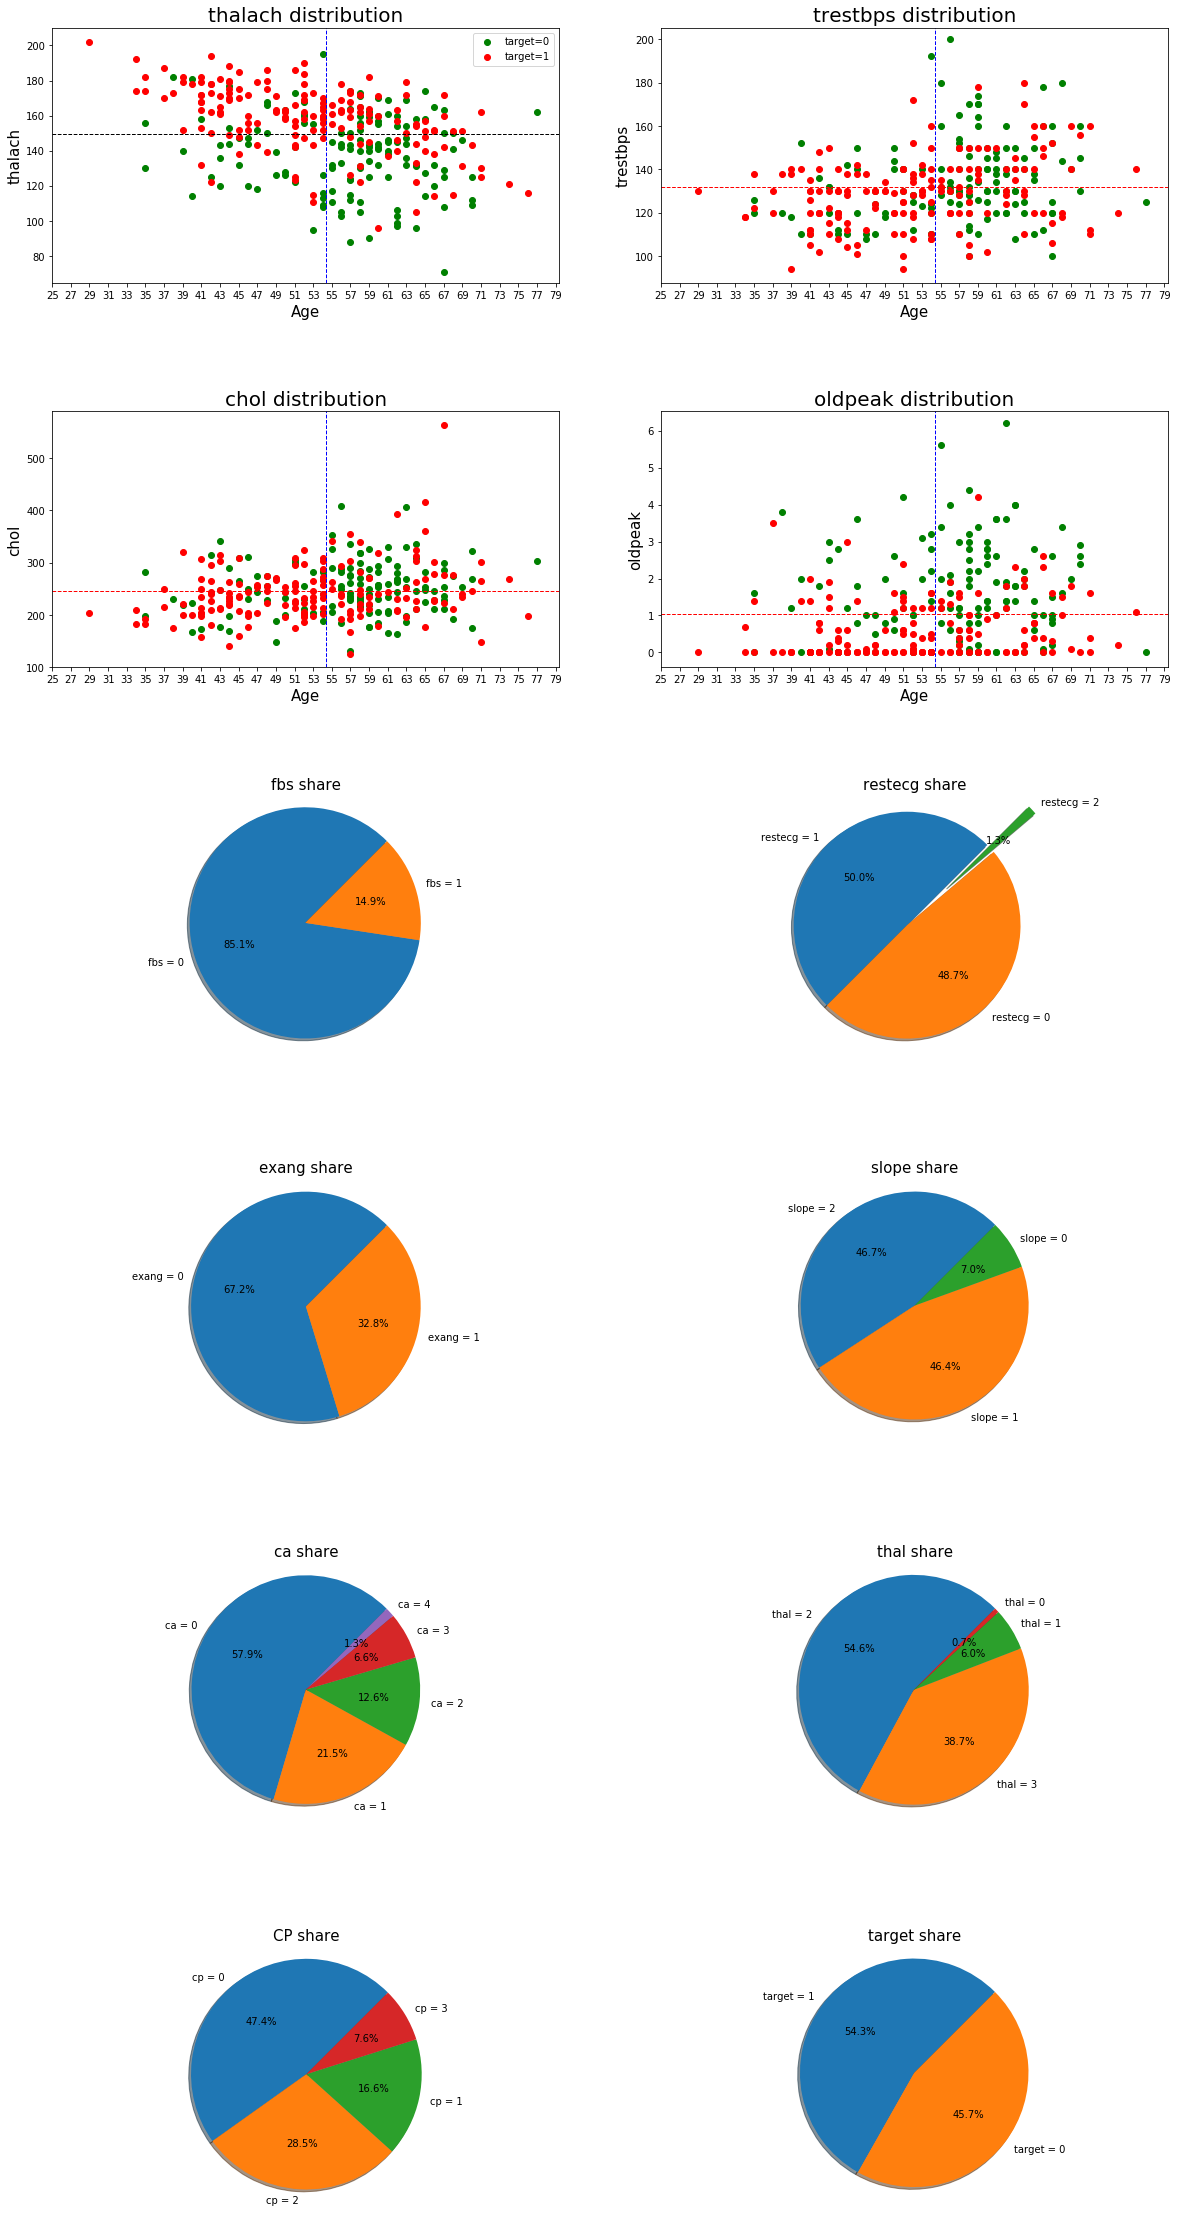

In [24]:
fig, axes = plt.subplots(6,2, figsize = (20,40))
plt.subplots_adjust(hspace = 0.5)

axes[0,0].scatter(df[df['target']==0][['age','thalach']].sort_values(by = ['age']).age,df[df['target']==0][['age','thalach']].sort_values(by = ['age']).thalach, c = 'g',label = 'target=0')
axes[0,0].scatter(df[df['target']==1][['age','thalach']].sort_values(by = ['age']).age,df[df['target']==1][['age','thalach']].sort_values(by = ['age']).thalach, c = 'r',label = 'target=1')
axes[0,0].set_title('thalach distribution',fontsize=20)
axes[0,0].set_xticks(range(25,80,2))
axes[0,0].set_xlabel('Age',fontsize=15)
axes[0,0].set_ylabel('thalach',fontsize=15)
axes[0,0].axhline(np.mean(df['thalach']),xmin=0,xmax=1,linewidth=1, color='black',linestyle = '--')
axes[0,0].axvline(np.mean(df['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')
axes[0,0].legend()

axes[0,1].scatter(df[df['target']==0][['age','trestbps']].sort_values(by = ['age']).age,df[df['target']==0][['age','trestbps']].sort_values(by = ['age']).trestbps, c = 'g',label = 'target=0')
axes[0,1].scatter(df[df['target']==1][['age','trestbps']].sort_values(by = ['age']).age,df[df['target']==1][['age','trestbps']].sort_values(by = ['age']).trestbps, c = 'r',label = 'target=1')
axes[0,1].set_title('trestbps distribution',fontsize=20)
axes[0,1].set_xticks(range(25,80,2))
axes[0,1].set_xlabel('Age',fontsize=15)
axes[0,1].set_ylabel('trestbps',fontsize=15)
axes[0,1].axhline(np.mean(df['trestbps']),xmin=0,xmax=1,linewidth=1, color='r',linestyle = '--')
axes[0,1].axvline(np.mean(df['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')

# heart_data[heart_data['target']==1][['age','chol',]].sort_values(by = ['age'])
axes[1,0].scatter(df[df['target']==0][['age','chol',]].sort_values(by = ['age']).age,df[df['target']==0][['age','chol',]].sort_values(by = ['age']).chol,c = 'g',label = 'target=0')
axes[1,0].scatter(df[df['target']==1][['age','chol',]].sort_values(by = ['age']).age,df[df['target']==1][['age','chol',]].sort_values(by = ['age']).chol,c = 'r',label = 'target=1')
axes[1,0].set_title('chol distribution',fontsize=20)
axes[1,0].set_xticks(range(25,80,2))
axes[1,0].set_xlabel('Age',fontsize=15)
axes[1,0].set_ylabel('chol',fontsize=15)
axes[1,0].axhline(np.mean(df['chol']),xmin=0,xmax=1,linewidth=1, color='r',linestyle = '--')
axes[1,0].axvline(np.mean(df['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')

axes[1,1].scatter(df[df['target']==0][['age','oldpeak',]].sort_values(by = ['age']).age,df[df['target']==0][['age','oldpeak',]].sort_values(by = ['age']).oldpeak,c = 'g',label = 'target=0')
axes[1,1].scatter(df[df['target']==1][['age','oldpeak',]].sort_values(by = ['age']).age,df[df['target']==1][['age','oldpeak',]].sort_values(by = ['age']).oldpeak,c = 'r',label = 'target=1')
axes[1,1].set_title('oldpeak distribution',fontsize=20)
axes[1,1].set_xticks(range(25,80,2))
axes[1,1].set_xlabel('Age',fontsize=15)
axes[1,1].set_ylabel('oldpeak',fontsize=15)
axes[1,1].axhline(np.mean(df['oldpeak']),xmin=0,xmax=1,linewidth=1, color='r',linestyle = '--')
axes[1,1].axvline(np.mean(df['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')

fbs_count = df['fbs'].value_counts()
labels = [('fbs = '+ str(x)) for x in fbs_count.index]
axes[2,0].pie(fbs_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[2,0].axis('equal')
axes[2,0].set_title('fbs share',fontsize=15)

restecg_count = df['restecg'].value_counts()
labels = [('restecg = '+ str(x)) for x in restecg_count.index]
axes[2,1].pie(restecg_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45,explode = [0,0,0.5])
axes[2,1].axis('equal')
axes[2,1].set_title('restecg share',fontsize=15)

exang_count = df['exang'].value_counts()
labels = [('exang = '+ str(x)) for x in exang_count.index]
axes[3,0].pie(exang_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[3,0].axis('equal')
axes[3,0].set_title('exang share',fontsize=15)

slope_count = df['slope'].value_counts()
labels = [('slope = '+ str(x)) for x in slope_count.index]
axes[3,1].pie(slope_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[3,1].axis('equal')
axes[3,1].set_title('slope share',fontsize=15)

ca_count = df['ca'].value_counts()
labels = [('ca = '+ str(x)) for x in ca_count.index]
axes[4,0].pie(ca_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[4,0].axis('equal')
axes[4,0].set_title('ca share',fontsize=15)

thal_count = df['thal'].value_counts()
labels = [('thal = '+ str(x)) for x in thal_count.index]
axes[4,1].pie(thal_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[4,1].axis('equal')
axes[4,1].set_title('thal share',fontsize=15)

cp_count = df['cp'].value_counts()
labels = [('cp = '+ str(x)) for x in cp_count.index]
axes[5,0].pie(cp_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[5,0].axis('equal')
axes[5,0].set_title('CP share',fontsize=15)

target_count = df['target'].value_counts()
labels = [('target = '+ str(x)) for x in target_count.index]
axes[5,1].pie(target_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[5,1].axis('equal')
axes[5,1].set_title('target share',fontsize=15)

plt.show()

In [26]:
#  Lets look at the correlation matrix and plot it using Pandas Style and Matplotlib
df.corr().round(decimals =2).style.background_gradient(cmap = 'Reds')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1,-0.09,-0.06,0.28,0.21,0.12,-0.11,-0.4,0.09,0.21,-0.16,0.3,0.07,-0.22
sex,-0.09,1,-0.05,-0.06,-0.2,0.05,-0.06,-0.05,0.14,0.1,-0.03,0.11,0.21,-0.28
cp,-0.06,-0.05,1,0.05,-0.07,0.1,0.04,0.29,-0.39,-0.15,0.12,-0.2,-0.16,0.43
trestbps,0.28,-0.06,0.05,1,0.13,0.18,-0.12,-0.05,0.07,0.19,-0.12,0.1,0.06,-0.15
chol,0.21,-0.2,-0.07,0.13,1,0.01,-0.15,-0.01,0.06,0.05,0,0.09,0.1,-0.08
fbs,0.12,0.05,0.1,0.18,0.01,1,-0.08,-0.01,0.02,0,-0.06,0.14,-0.03,-0.03
restecg,-0.11,-0.06,0.04,-0.12,-0.15,-0.08,1,0.04,-0.07,-0.06,0.09,-0.08,-0.01,0.13
thalach,-0.4,-0.05,0.29,-0.05,-0.01,-0.01,0.04,1,-0.38,-0.34,0.38,-0.23,-0.09,0.42
exang,0.09,0.14,-0.39,0.07,0.06,0.02,-0.07,-0.38,1,0.29,-0.26,0.13,0.21,-0.44
oldpeak,0.21,0.1,-0.15,0.19,0.05,0,-0.06,-0.34,0.29,1,-0.58,0.24,0.21,-0.43


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


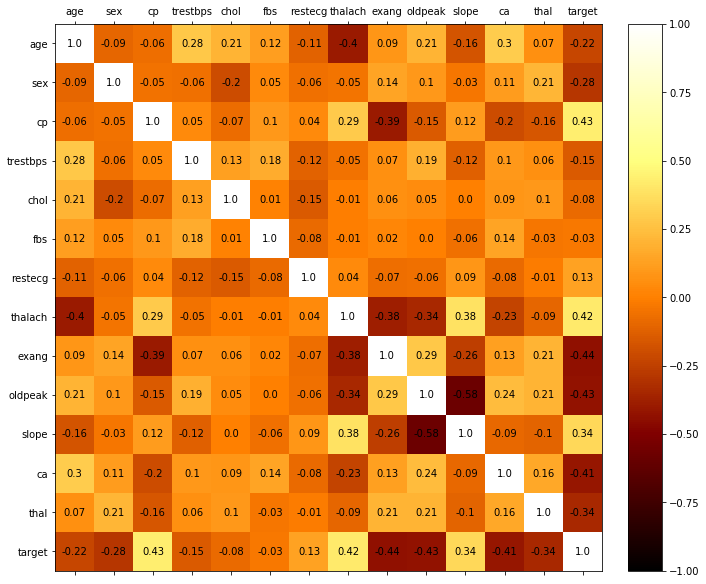

In [28]:
names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
correlations = df.corr()
# plot correlation matrix
fig, ax = plt.subplots(1,1, figsize = (10,8),constrained_layout=True)

cax = ax.matshow(correlations, vmin=-1, vmax=1,cmap = 'afmhot')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
for i in range(len(names)):
    for j in range(len(names)):
        text = ax.text(j, i, df.corr().as_matrix(columns= None)[i, j].round(decimals =2),
                       ha="center", va="center", color="black")
plt.show()

In [29]:
# Corelation with target

x = df.corr()
pd.DataFrame(x['target']).sort_values(by='target',ascending = False).style.background_gradient(cmap = 'Greens')

,target
target,1
cp,0.43208
thalach,0.419955
slope,0.34394
restecg,0.134874
fbs,-0.026826
chol,-0.0814372
trestbps,-0.146269
age,-0.221476
sex,-0.283609


In [30]:
# Importing stuff
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
#Preprocessing data

#    Scaling the Data before doing anomoly detection
#    As anomoly detection methods works better with scaled data, but there is no compulsory need to do so.
#    Scale only continous data


In [32]:
# We have already saved all the continous columns

print('Columns with continous data = ',num_columns)

import scipy.stats as stats

fig, axes = plt.subplots(2,2, figsize = (15,12))
plt.subplots_adjust(hspace = 0.2)

h= np.sort(df.thalach)
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
axes[0,0].plot(h,fit,'--')
axes[0,0].hist(h,density=True) 
axes[0,0].set_title("thalach")
axes[0,0].set_ylabel('Density')

h2= np.sort(df.trestbps)
fit2 = stats.norm.pdf(h2, np.mean(h2), np.std(h2)) 
axes[0,1].plot(h2,fit2,'--')
axes[0,1].hist(h2,density=True) 
axes[0,1].set_title("trestbps")
axes[0,1].set_ylabel('Density')

h3= np.sort(df.chol)
fit3 = stats.norm.pdf(h3, np.mean(h3), np.std(h3)) 
axes[1,0].plot(h3,fit3,'--')
axes[1,0].hist(h3,density=True) 
axes[1,0].set_title("chol")
axes[1,0].set_ylabel('Density')

h4= np.sort(df.oldpeak)
fit4 = stats.norm.pdf(h4, np.mean(h4), np.std(h4)) 
axes[1,1].plot(h4,fit4,'--')
axes[1,1].hist(h4,density=True) 
axes[1,1].set_title("oldpeak")
axes[1,1].set_ylabel('Density')

plt.show()

print(r"Scaling them using MinMax Scaler")

NameError: name 'num_columns' is not defined